In [186]:
import numpy as np
import matplotlib.pyplot as plt

In [187]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([-1,1,1,-1])

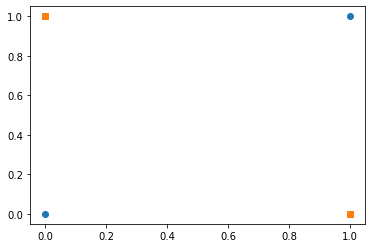

In [188]:
fig = plt.figure()
plt.scatter(X[Y==-1, 0], X[Y==-1, 1], label='class 0', marker='o')
plt.scatter(X[Y==1, 0], X[Y==1, 1], label='class 1', marker='s') 
plt.show()

In [189]:
# 2維映射到3維
def mapping(x):    
    x_1 = x[:,0]**2        
    x_2 = np.sqrt(2)*x[:,0]*x[:,1]        
    x_3 = x[:,1]**2			    
    trans_x = np.array([x_1, x_2, x_3])				
    return trans_x

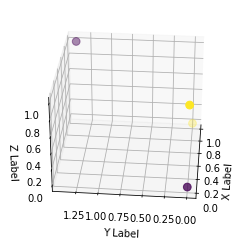

In [190]:
x_1  = mapping(X)          #X_1的shape為(3,4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[2], c=Y, s=60)  #依序在三維空間中畫出4個點
ax.view_init(30, 185)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [191]:
#多項式kernel(degree=2): k(a,b) = (<a^T, b>)²
def kernelfun(a,b):
    if (a.shape!=(1,2) or b.shape!=(1,2)):       #mapping需要二維的資料
        a=a.reshape(1,2)
        b=b.reshape(1,2)
    return int(np.dot(mapping(a).T,mapping(b)))

def sign(z):
    if z > 0:
        return 1
    else:
        return -1

In [192]:
def error_num(X,Y,a):
    error = 0
    for s in range(len(X)):
        sum = 0
        for j in range(len(X)):
            g = a[j]*Y[j]*kernelfun(X[j],X[s])
            sum += g
        if sign(sum) != Y[s]:
            error += 1
    return error    

In [193]:
a = np.array([0,0,0,0])
numIter = 100
def kernelperceptron(X,Y,a):
    count = 0
    while error_num(X,Y,a) !=0 and count < numIter :
        for s in range(len(X)):
            sum = 0
            for j in range(len(X)):
                g = a[j]*Y[j]*kernelfun(X[j],X[s])
                sum += g
            print("sum(s={})={}    g(s={})={}".format(s,sum,s,sign(sum)))
            if Y[s]*sum <= 0:
                a[s] += 1
        count += 1
        print("第{}次迭代結束".format(count))
        print("a=",a)
    else:
        print("分類完成")
    return a

In [194]:
vector = kernelperceptron(X,Y,a)

sum(s=0)=0    g(s=0)=-1
sum(s=1)=0    g(s=1)=-1
sum(s=2)=0    g(s=2)=-1
sum(s=3)=2    g(s=3)=1
第1次迭代結束
a= [1 1 1 1]
sum(s=0)=0    g(s=0)=-1
sum(s=1)=0    g(s=1)=-1
sum(s=2)=0    g(s=2)=-1
sum(s=3)=0    g(s=3)=-1
第2次迭代結束
a= [2 2 2 2]
sum(s=0)=0    g(s=0)=-1
sum(s=1)=0    g(s=1)=-1
sum(s=2)=0    g(s=2)=-1
sum(s=3)=-2    g(s=3)=-1
第3次迭代結束
a= [3 3 3 2]
分類完成
